#### This notebook examines the abrupt experiments which follow a 200 year spinup using ACCESS-OM2-1.


The downward longwave and SAT forcing fields are modified as globally uniform, time-independent constant perturbations of $\pm$ 8 W/m^2 and $\pm$ 1.5C following _Stewart and Hogg (2019)_, and $\pm$ 16 W/m^2 and $\pm$ 3C for the x2 experiment. The model is forcied with _specific humidity_ here in order to examine a bug which seems to be occuring when we force with _relative humidity_.

In [7]:
import cosima_cookbook as cc
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cmocean as cm
from scipy.optimize import curve_fit

from dask.distributed import Client

%matplotlib inline

In [8]:
client = Client()
display(client)

Client Scheduler: tcp://127.0.0.1:33813 Dashboard: /proxy/33001/status,Cluster Workers: 4 Cores: 8 Memory: 128.85 GB


In [9]:
### Open session

db = '1deg_jra55_ryf_experiments_abrupt.db'
session = cc.database.create_session(db)

# directory_list = ['/g/data/e14/mp2135/access-om2/archive/1deg_jra55_ryf_cont',
#                   '/g/data/e14/mp2135/access-om2/archive/1deg_jra55_ryf_rcp45cool',
#                  '/g/data/e14/mp2135/access-om2/archive/1deg_jra55_ryf_rcp45warm',
#                  '/g/data/e14/mp2135/access-om2/archive/1deg_jra55_ryf_rcp45cool_x2',
#                  '/g/data/e14/mp2135/access-om2/archive/1deg_jra55_ryf_rcp45warm_x2']

In [10]:
cc.querying.get_experiments(session)

,experiment,ncfiles
0,1deg_jra55_ryf_cont,21220
1,1deg_jra55_ryf_rcp45cool,47726
2,1deg_jra55_ryf_rcp45warm,45662
3,1deg_jra55_ryf_rcp45cool_x2,9534
4,1deg_jra55_ryf_rcp45warm_x2,9534
5,1deg_jra55_ryf_RCPwarm_x1,9534
6,1deg_jra55_ryf_RCPwarm_x2,9534


### Calculate global average temperature

In [28]:
yr_end = '2149-12-31'

expt = '1deg_jra55_ryf_cont'
var = 'temp'
frequency = '1 monthly'
temp_cont = cc.querying.getvar(expt, var, session, end_time = yr_end, frequency = frequency).chunk(chunks='auto')

var = 'dzt'
dzt = cc.querying.getvar(expt, var, session) #thickness of cells
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) # area of cells
dVol = (dzt * area_t) # Volume of cells
Vol = dVol.sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) # total volume of ocean

temp_cont_ave = (temp_cont * dVol).sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) / Vol

In [29]:
expt = '1deg_jra55_ryf_RCPwarm_x1'
var = 'temp'
frequency = '1 monthly'
temp_RCPwarm_x1 = cc.querying.getvar(expt, var, session, frequency = frequency).chunk(chunks='auto') 

var = 'dzt'
dzt = cc.querying.getvar(expt, var, session) #thickness of cells
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) # area of cells
dVol = (dzt * area_t) # Volume of cells
Vol = dVol.sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) # total volume of ocean

temp_RCPwarm_x1_ave = (temp_RCPwarm_x1 * dVol).sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) / Vol

In [30]:
expt = '1deg_jra55_ryf_RCPwarm_x2'
var = 'temp'
frequency = '1 monthly'
temp_RCPwarm_x2 = cc.querying.getvar(expt, var, session, frequency = frequency).chunk(chunks='auto')

var = 'dzt'
dzt = cc.querying.getvar(expt, var, session) #thickness of cells
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) # area of cells
dVol = (dzt * area_t) # Volume of cells
Vol = dVol.sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) # total volume of ocean

temp_RCPwarm_x2_ave = (temp_RCPwarm_x2 * dVol).sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) / Vol

In [18]:
expt = '1deg_jra55_ryf_rcp45cool'
var = 'temp'
frequency = '1 monthly'
temp_cool = cc.querying.getvar(expt, var, session, end_time = yr_end, frequency = frequency).chunk(chunks='auto') 

var = 'dzt'
dzt = cc.querying.getvar(expt, var, session) #thickness of cells
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) # area of cells
dVol = (dzt * area_t) # Volume of cells
Vol = dVol.sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) # total volume of ocean

temp_cool_ave = (temp_cool * dVol).sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) / Vol

In [19]:
expt = '1deg_jra55_ryf_rcp45warm'
var = 'temp'
frequency = '1 monthly'
temp_warm = cc.querying.getvar(expt, var, session, end_time = yr_end, frequency = frequency).chunk(chunks='auto')

var = 'dzt'
dzt = cc.querying.getvar(expt, var, session) #thickness of cells
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) # area of cells
dVol = (dzt * area_t) # Volume of cells
Vol = dVol.sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) # total volume of ocean

temp_warm_ave = (temp_warm * dVol).sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) / Vol

In [20]:
expt = '1deg_jra55_ryf_rcp45cool_x2'
var = 'temp'
frequency = '1 monthly'
temp_coolx2 = cc.querying.getvar(expt, var, session, end_time = yr_end, frequency = frequency).chunk(chunks='auto') 

var = 'dzt'
dzt = cc.querying.getvar(expt, var, session) #thickness of cells
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) # area of cells
dVol = (dzt * area_t) # Volume of cells
Vol = dVol.sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) # total volume of ocean

temp_coolx2_ave = (temp_coolx2 * dVol).sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) / Vol

In [21]:
expt = '1deg_jra55_ryf_rcp45warm_x2'
var = 'temp'
frequency = '1 monthly'
temp_warmx2 = cc.querying.getvar(expt, var, session, end_time = yr_end, frequency = frequency).chunk(chunks='auto')

var = 'dzt'
dzt = cc.querying.getvar(expt, var, session) #thickness of cells
area_t = cc.querying.getvar(expt, 'area_t', session, n=1) # area of cells
dVol = (dzt * area_t) # Volume of cells
Vol = dVol.sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) # total volume of ocean

temp_warmx2_ave = (temp_warmx2 * dVol).sum(dim = ['xt_ocean', 'yt_ocean', 'st_ocean']) / Vol

In [35]:
temp_cont_ave = temp_cont_ave.groupby('time.year').mean(dim='time').load()
temp_RCPwarm_x1_ave = temp_RCPwarm_x1_ave.groupby('time.year').mean(dim='time').load()
temp_RCPwarm_x2_ave = temp_RCPwarm_x2_ave.groupby('time.year').mean(dim='time').load()


# temp_cool_ave = temp_cool_ave.groupby('time.year').mean(dim='time').load()
# temp_warm_ave = temp_warm_ave.groupby('time.year').mean(dim='time').load()
# temp_coolx2_ave = temp_coolx2_ave.groupby('time.year').mean(dim='time').load()
# temp_warmx2_ave = temp_warmx2_ave.groupby('time.year').mean(dim='time').load()

#### Plotting globally averaged temperature over time

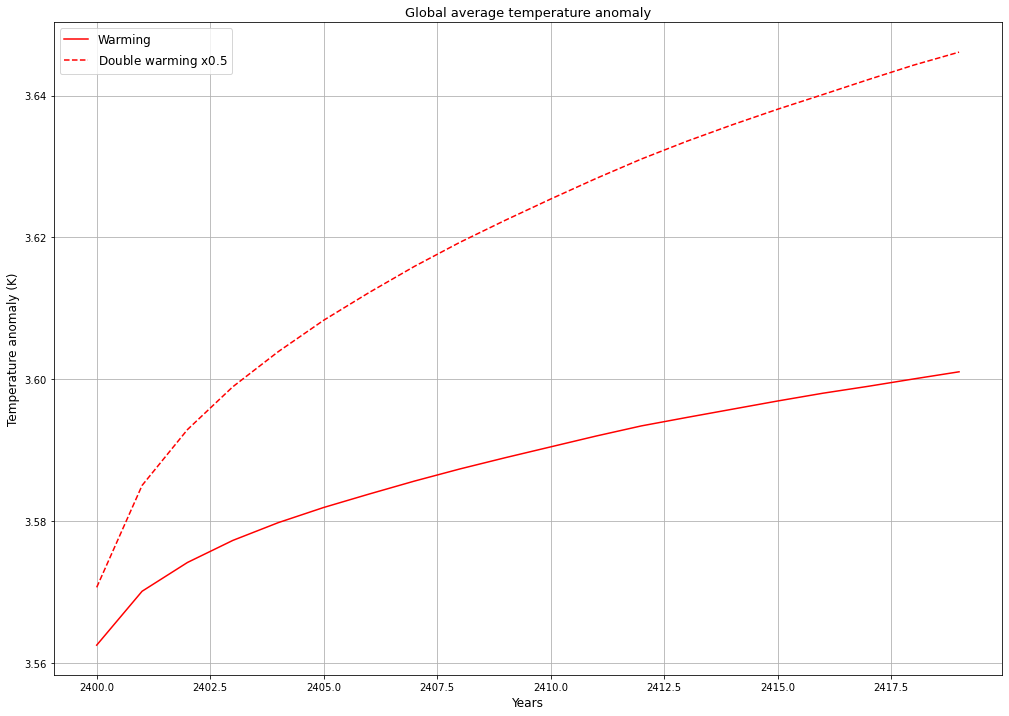

In [45]:
plt.figure(figsize = (17,12))

zero = xr.DataArray(data=[0], dims='year', coords={"year": [2399]})
# cool_anom_plot = xr.concat([zero, temp_cool_ave - temp_cont_ave], dim='year')
# warm_anom_plot = xr.concat([zero, temp_warm_ave - temp_cont_ave], dim='year')
# coolx2_anom_plot = xr.concat([zero, temp_coolx2_ave - temp_cont_ave], dim='year')
# warmx2_anom_plot = xr.concat([zero, temp_warmx2_ave - temp_cont_ave], dim='year')

# (- 1 * cool_anom_plot).plot(label='Cooling x$-1$', color = 'b')
# warm_anom_plot.plot(label='Warming', color = 'r')
# (-0.5 * coolx2_anom_plot).plot(label='Double cooling x$-0.5$', color = 'b', linestyle = '--')
# (0.5 * warmx2_anom_plot).plot(label='Double warming x$0.5$', color = 'r', linestyle = '--')

RCPwarm_x1_anom_plot.plot(label='Warming', color = 'r')
(0.5 * RCPwarm_x2_anom_plot).plot(label='Double warming', color = 'r', linestyle = '--')

plt.title('Global average temperature anomaly', fontsize=13)
plt.ylabel('Temperature anomaly (K)', fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
#plt.savefig('global_average_temp_bad_humid_2100-2150.jpg')

### Calculate SST

In [42]:
yr_end = '2149-12-31'

expt = '1deg_jra55_ryf_cont'
var = 'temp_surface_ave'
SST_cont = cc.querying.getvar(expt, var, session, end_time = yr_end)[:-1].chunk(chunks='auto')

In [44]:
expt = '1deg_jra55_ryf_rcp45cool'
var = 'temp_surface_ave'
SST_cool = cc.querying.getvar(expt, var, session, end_time = yr_end)[:-1].chunk(chunks='auto') 

In [45]:
expt = '1deg_jra55_ryf_rcp45warm'
var = 'temp_surface_ave'
SST_warm = cc.querying.getvar(expt, var, session, end_time = yr_end)[:-1].chunk(chunks='auto')

In [46]:
expt = '1deg_jra55_ryf_rcp45cool_x2'
var = 'temp_surface_ave'
SST_coolx2 = cc.querying.getvar(expt, var, session, end_time = yr_end)[:-1].chunk(chunks='auto') 

In [47]:
expt = '1deg_jra55_ryf_rcp45warm_x2'
var = 'temp_surface_ave'
SST_warmx2 = cc.querying.getvar(expt, var, session, end_time = yr_end)[:-1].chunk(chunks='auto') 

In [49]:
expt = '1deg_jra55_ryf_RCPwarm_x1'
var = 'temp_surface_ave'
SST_RCPwarm_x1 = cc.querying.getvar(expt, var, session)[:-1].chunk(chunks='auto') 

In [50]:
expt = '1deg_jra55_ryf_RCPwarm_x2'
var = 'temp_surface_ave'
SST_RCPwarm_x2 = cc.querying.getvar(expt, var, session)[:-1].chunk(chunks='auto')

In [52]:
# SST_cont = SST_cont.groupby('time.year').mean(dim='time').load()
# SST_cool = SST_cool.groupby('time.year').mean(dim='time').load()
# SST_warm = SST_warm.groupby('time.year').mean(dim='time').load()
# SST_coolx2 = SST_coolx2.groupby('time.year').mean(dim='time').load()
# SST_warmx2 = SST_warmx2.groupby('time.year').mean(dim='time').load()

SST_RCPwarm_x1 = SST_RCPwarm_x1.groupby('time.year').mean(dim='time').load()
SST_RCPwarm_x2 = SST_RCPwarm_x2.groupby('time.year').mean(dim='time').load()

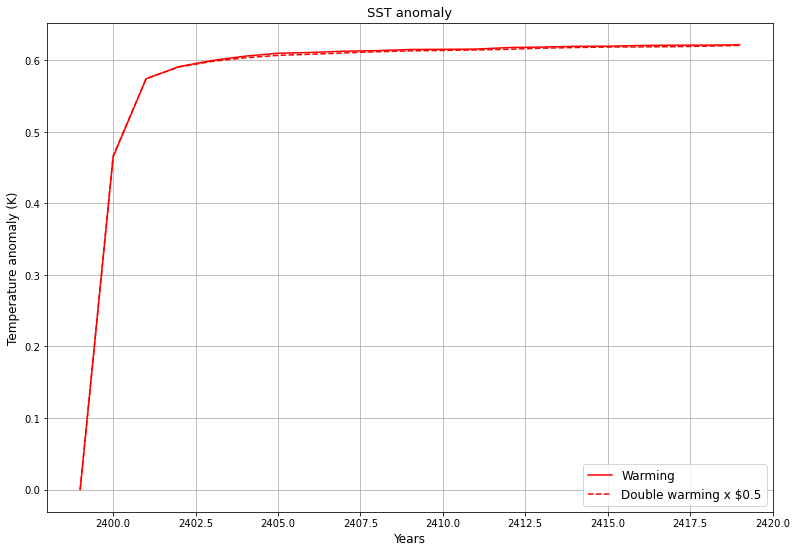

In [75]:
plt.figure(figsize = (13,9))

zero = xr.DataArray(data=[0], dims='year', coords={"year": [2399]})
# SST_cool_anom_plot = xr.concat([zero, SST_cool[:,0] - SST_cont[:,0]], dim='year')
# SST_warm_anom_plot = xr.concat([zero, SST_warm[:,0] - SST_cont[:,0]], dim='year')
# SST_warm_anom_plot[4] = SST_warm_anom_plot[4]-0.045
# SST_coolx2_anom_plot = xr.concat([zero, SST_coolx2[:,0] - SST_cont[:,0]], dim='year')
# SST_warmx2_anom_plot = xr.concat([zero, SST_warmx2[:,0] - SST_cont[:,0]], dim='year')

# (-1 * SST_cool_anom_plot).plot(label='Cooling x$-1$', color = 'b')
# SST_warm_anom_plot.plot(label='Warming', color = 'r')
# (-0.5 * SST_coolx2_anom_plot).plot(label='Double cooling x$-0.5$', color = 'b', linestyle = '--')
# (0.5 * SST_warmx2_anom_plot).plot(label='Double warming x$0.5$', color = 'r', linestyle = '--')

# Average value of control SST between 2400 and 2419 is 18.2877681 (calculated in a different notebook):

SST_RCPwarm_x1_anom_plot = xr.concat([zero, SST_RCPwarm_x1 - 18.2877681], dim='year')
SST_RCPwarm_x2_anom_plot = xr.concat([zero, SST_RCPwarm_x2 - 18.2877681], dim='year')

SST_RCPwarm_x1_anom_plot.plot(label='Warming', color = 'r')
(0.5 * SST_RCPwarm_x2_anom_plot).plot(label='Double warming x $0.5', color = 'r', linestyle = '--')

plt.title('SST anomaly', fontsize=13)
plt.ylabel('Temperature anomaly (K)', fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.savefig('SST_bad_humid.jpg')